In [1]:
import pandas as pd

import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = (14, 6)
plt.style.use('fivethirtyeight')

In [3]:
avocado = pd.read_csv('avocado.csv')
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avocado.columns = avocado.columns.str.replace(' ', '_')
avocado.head()

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado.head()

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
avocado.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total_Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total_Bags             float64
Small_Bags             float64
Large_Bags             float64
XLarge_Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [7]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total_Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total_Bags      18249 non-null float64
Small_Bags      18249 non-null float64
Large_Bags      18249 non-null float64
XLarge_Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [8]:
avocado.shape

(18249, 13)

In [9]:
avocado.describe()

,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


###### Checking Missing Values

In [10]:
avocado.isnull().sum()

Date            0
AveragePrice    0
Total_Volume    0
4046            0
4225            0
4770            0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
dtype: int64

###### Visualization

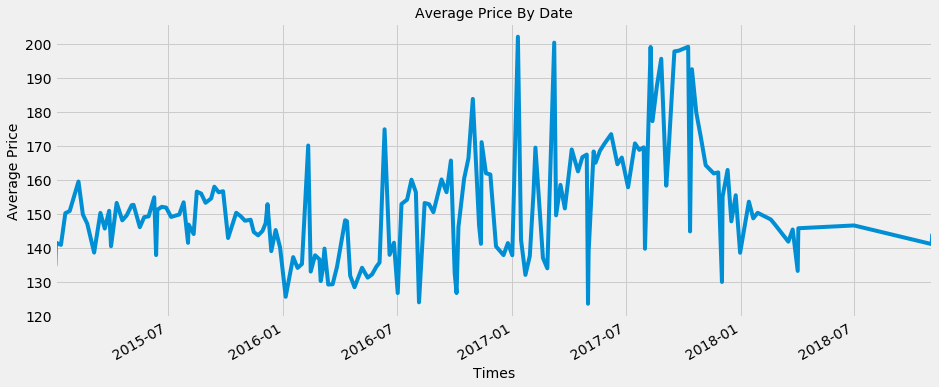

In [11]:
avocado.groupby('Date').AveragePrice.sum().plot()

plt.title('Average Price By Date', fontsize = 14)
plt.ylabel('Average Price', fontsize = 14)
plt.xlabel('Times', fontsize = 14)
plt.show()

###### Average Price in Albany region

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

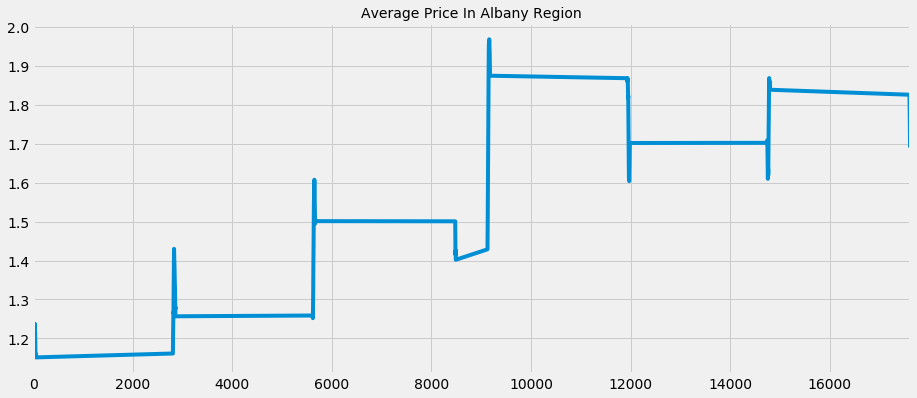

In [12]:
albany_df = avocado[avocado['region'] == 'Albany']
albany_df['AveragePrice'].rolling(25).mean().plot()

plt.title('Average Price In Albany Region', fontsize = 14)
plt.show()

In [13]:
albany_df.dropna(how='any').head()

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


###### Finding Unique region

In [14]:
avocado['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [16]:
avocado['region'].value_counts()

GreatLakes             338
TotalUS                338
RaleighGreensboro      338
Philadelphia           338
Plains                 338
SouthCentral           338
LasVegas               338
Detroit                338
RichmondNorfolk        338
Southeast              338
Tampa                  338
HartfordSpringfield    338
Syracuse               338
SanDiego               338
Midsouth               338
NorthernNewEngland     338
CincinnatiDayton       338
Atlanta                338
Chicago                338
Orlando                338
StLouis                338
SanFrancisco           338
MiamiFtLauderdale      338
Jacksonville           338
Roanoke                338
California             338
BuffaloRochester       338
GrandRapids            338
LosAngeles             338
Charlotte              338
Nashville              338
Pittsburgh             338
West                   338
Denver                 338
NewYork                338
Boise                  338
Northeast              338
S

###### Sum of Average Price By Types of Avocado

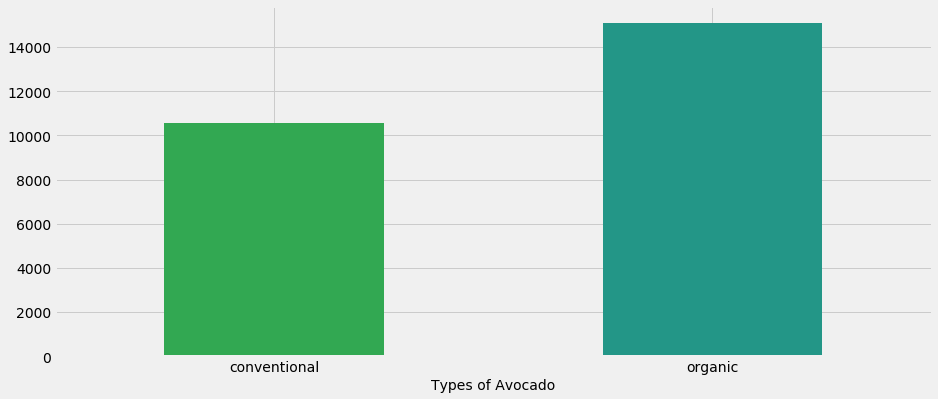

In [17]:
labels = ['Conventional', 'Organic']
avocado.groupby('type').AveragePrice.sum().plot(kind = 'bar', rot =0, color = ['#32a852', '#239687'])

plt.xlabel("Types of Avocado", fontsize = 14)
plt.show()

###### Percentage of Types of Avocado

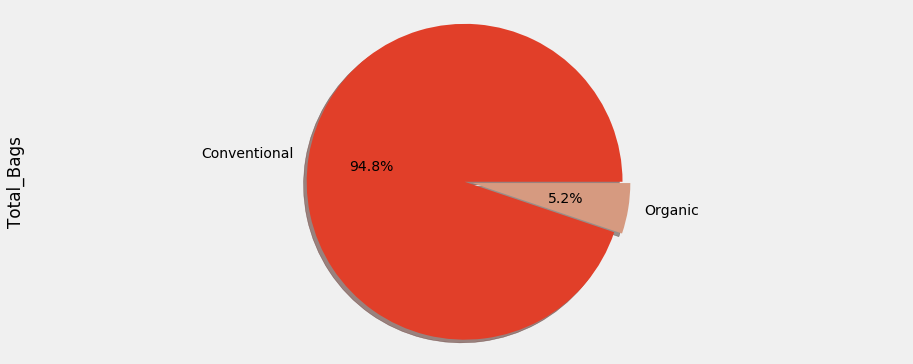

In [18]:
type_grp = avocado.groupby('type').Total_Bags.sum()

type_grp.plot(kind='pie', labels= ['Conventional', 'Organic'], autopct='%1.1f%%', fontsize = 14, shadow=True, 
              colors = ["#E13F29", "#D69A80"], explode = (0, 0.05) )

plt.axis('equal')
plt.show()

###### Average of Total Volume By Year

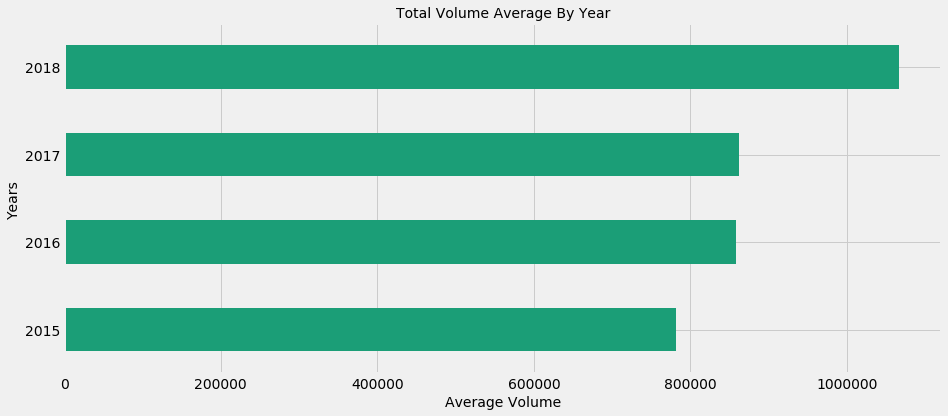

In [19]:
avocado.groupby('year').Total_Volume.mean().plot(kind = 'barh', cmap = 'Dark2')

plt.title('Total Volume Average By Year', fontsize = 14)
plt.xlabel('Average Volume', fontsize = 14)
plt.ylabel('Years', fontsize = 14)
plt.show()

###### Counting Total Volume for Boston region

In [20]:
avocado['Total_Volume'][avocado['region'] == 'Boston'].value_counts()

453631.25    1
632855.52    1
417750.36    1
686734.63    1
9327.19      1
599178.18    1
550948.58    1
678810.37    1
22165.79     1
26314.71     1
9786.33      1
2023.36      1
629090.87    1
485736.10    1
2943.85      1
12442.73     1
490022.14    1
16980.59     1
572421.46    1
4235.93      1
602605.29    1
709563.16    1
589471.32    1
482271.83    1
13143.32     1
451608.73    1
23890.76     1
18536.65     1
665086.17    1
534488.54    1
            ..
29468.36     1
9526.60      1
651616.91    1
11590.31     1
582023.28    1
455915.26    1
577976.65    1
579577.33    1
8395.34      1
28957.04     1
685417.51    1
376500.91    1
355432.28    1
634515.74    1
577774.74    1
690517.19    1
524513.26    1
26149.55     1
19686.52     1
34809.90     1
504619.83    1
568255.53    1
399883.99    1
999783.13    1
17727.36     1
2623.42      1
13904.53     1
17555.20     1
924194.42    1
8408.00      1
Name: Total_Volume, Length: 338, dtype: int64

###### Total Volume in 2016 in Atlanta, Using Multiple Criteria

In [21]:
avocado[(avocado.Total_Volume > 80000 ) & (avocado.year == 2016) & (avocado.region == 'Atlanta') & 
        (avocado.AveragePrice > 1)]

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
2862,2016-11-12,1.06,422026.71,186343.72,56200.04,171.64,179311.31,112574.78,66736.53,0.00,conventional,2016,Atlanta
2863,2016-04-12,1.03,475815.02,210602.15,93414.72,207.15,171591.00,67806.59,103784.41,0.00,conventional,2016,Atlanta
2864,2016-11-27,1.22,372144.31,161631.62,55595.26,167.47,154749.96,89194.82,65518.75,36.39,conventional,2016,Atlanta
2865,2016-11-20,1.14,448936.04,189206.59,58005.57,167.63,201556.25,128442.19,72236.28,877.78,conventional,2016,Atlanta
2866,2016-11-13,1.25,408260.87,185966.29,63348.63,180.57,158765.38,92308.66,66233.39,223.33,conventional,2016,Atlanta
2867,2016-06-11,1.29,393826.35,167083.47,65207.61,168.26,161367.01,82410.76,78956.25,0.00,conventional,2016,Atlanta
2868,2016-10-30,1.26,408314.87,162367.80,69366.17,160.28,176420.62,94305.34,82115.28,0.00,conventional,2016,Atlanta
2869,2016-10-23,1.23,422281.05,171215.14,67824.33,166.14,183075.44,110435.47,72639.97,0.00,conventional,2016,Atlanta
2870,2016-10-16,1.16,459564.78,188793.29,82089.21,103.96,188578.32,87593.44,100984.88,0.00,conventional,2016,Atlanta
2871,2016-09-10,1.23,452109.18,187260.61,69425.23,156.52,195266.82,95659.91,99113.85,493.06,conventional,2016,Atlanta


###### Average of Large and Small bags

In [22]:
avocado.groupby('year').Large_Bags.mean()

year
2015    23520.285037
2016    59940.587974
2017    69790.115367
2018    95358.015340
Name: Large_Bags, dtype: float64

In [23]:
avocado.groupby('year').Small_Bags.mean()

year
2015    113033.429256
2016    197025.327568
2017    213728.158838
2018    278349.820795
Name: Small_Bags, dtype: float64

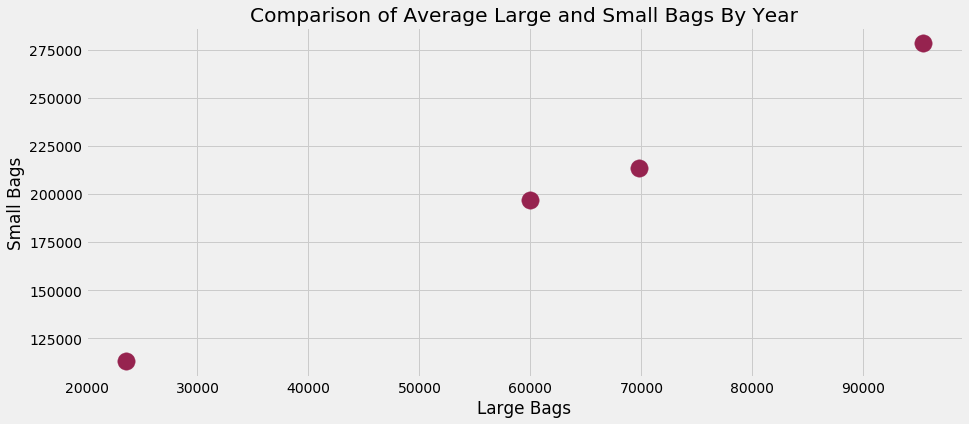

In [24]:
large = avocado.groupby('year').Large_Bags.mean()
small = avocado.groupby('year').Small_Bags.mean()

plt.scatter(x = large, y = small, color = '#96234f', s = 300)
plt.title('Comparison of Average Large and Small Bags By Year')
plt.xlabel('Large Bags')
plt.ylabel('Small Bags')
plt.show()